In [ ]:
#Importing libraries

In [103]:
import os
os.chdir("D:/credit scoring")

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data= pd.read_excel("Credit_train.xlsx")
df= data.copy()
df.head()

,Sr.no,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [106]:
df.isnull().sum()

Sr.no                                      0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           2957
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       415
dtype: int64

In [82]:
#Monthly income and number of dependents values are missing. Imputing them with mean and median

In [107]:
m1 = df.MonthlyIncome.mean()
m2= df.NumberOfDependents.median()

df.loc[df.MonthlyIncome.isnull(),'MonthlyIncome'] = m1
df.loc[df.NumberOfDependents.isnull(),'NumberOfDependents'] = m2

In [108]:
#df.NumberOfDependents.value_counts()

0    14028
1      971
Name: SeriousDlqin2yrs, dtype: int64


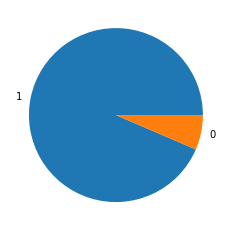

In [109]:
pie = df.SeriousDlqin2yrs.value_counts()
print(pie)
lab= '1','0'
plt.pie(pie, labels = lab)
plt.show()

In [110]:
#We have imbalanced data which is fine as number of defaults will always be very low compared to normal accounts

In [111]:
df.columns

Index(['Sr.no', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines',
       'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [112]:
#Removing the unnecessary variables from our data

df= df.drop(['Sr.no'], axis=1)
print(df.columns)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [113]:
df= df.rename(columns={'age':'Age'})
df= df.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'Times_30-59_DPD'})
df= df.rename(columns={'NumberOfTimes90DaysLate':'Times_90_DPD'})
df= df.rename(columns={'NumberOfTime60-89DaysPastDueNotWorse':'Times_60-89_DPD'})
df= df.rename(columns={'RevolvingUtilizationOfUnsecuredLines':'Utilazn_unsecure_lines'})
df= df.rename(columns={'NumberOfOpenCreditLinesAndLoans':'No_ofOpenCreditLinesAndLoans'})
df= df.rename(columns={'NumberRealEstateLoansOrLines':'No_ofRealEstateLoansOrLines'})
print(df.columns)

Index(['SeriousDlqin2yrs', 'Utilazn_unsecure_lines', 'Age', 'Times_30-59_DPD',
       'DebtRatio', 'MonthlyIncome', 'No_ofOpenCreditLinesAndLoans',
       'Times_90_DPD', 'No_ofRealEstateLoansOrLines', 'Times_60-89_DPD',
       'NumberOfDependents'],
      dtype='object')


In [114]:
df.corr()

,SeriousDlqin2yrs,Utilazn_unsecure_lines,Age,Times_30-59_DPD,DebtRatio,MonthlyIncome,No_ofOpenCreditLinesAndLoans,Times_90_DPD,No_ofRealEstateLoansOrLines,Times_60-89_DPD,NumberOfDependents
SeriousDlqin2yrs,1.000000,0.007386,-0.119645,0.129307,-0.006454,-0.035425,-0.034977,0.120505,-0.010314,0.106524,0.024037
Utilazn_unsecure_lines,0.007386,1.000000,-0.004401,-0.001433,-0.002077,0.008275,-0.018111,-0.001248,0.010211,-0.001320,0.006658
Age,-0.119645,-0.004401,1.000000,-0.068662,0.027899,0.079904,0.141364,-0.067334,0.032223,-0.064138,-0.204878
Times_30-59_DPD,0.129307,-0.001433,-0.068662,1.000000,-0.007073,-0.019303,-0.050015,0.981816,-0.029423,0.985141,-0.011868
DebtRatio,-0.006454,-0.002077,0.027899,-0.007073,1.000000,-0.012981,0.038878,-0.008407,0.109433,-0.007202,-0.036922
MonthlyIncome,-0.035425,0.008275,0.079904,-0.019303,-0.012981,1.000000,0.187187,-0.025720,0.252620,-0.023439,0.112657
No_ofOpenCreditLinesAndLoans,-0.034977,-0.018111,0.141364,-0.050015,0.038878,0.187187,1.000000,-0.077643,0.440692,-0.067918,0.073137
Times_90_DPD,0.120505,-0.001248,-0.067334,0.981816,-0.008407,-0.025720,-0.077643,1.000000,-0.045871,0.992823,-0.019822
No_ofRealEstateLoansOrLines,-0.010314,0.010211,0.032223,-0.029423,0.109433,0.252620,0.440692,-0.045871,1.000000,-0.038370,0.134787
Times_60-89_DPD,0.106524,-0.001320,-0.064138,0.985141,-0.007202,-0.023439,-0.067918,0.992823,-0.038370,1.000000,-0.020221


<AxesSubplot:>

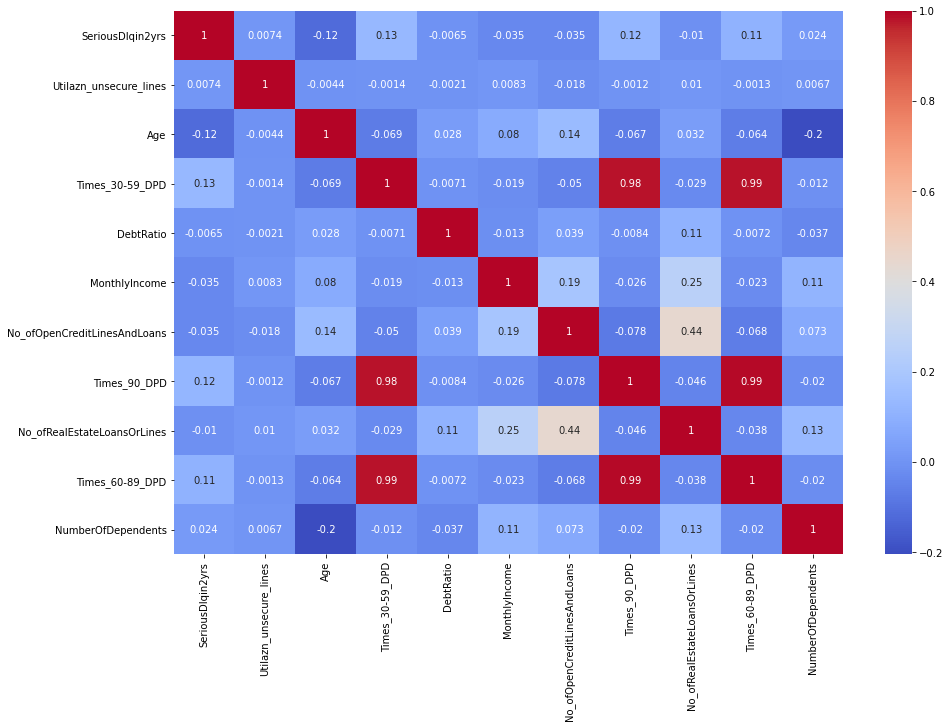

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [92]:
#High correlation filter
#Deleted the highly correlated variables and performed the whole analysis with logistic reg
'''
df1= df.copy()
df1= df1.drop(['Times_90_DPD','Times_60-89_DPD'], axis=1)
df1.columns

plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)
'''

#ROC score= 0.71, Gini = 0.43  #not acceptable

"\ndf1= df.copy()\ndf1= df1.drop(['Times_90_DPD','Times_60-89_DPD'], axis=1)\ndf1.columns\n\nplt.figure(figsize=(15,10))\nsns.heatmap(df1.corr(),cmap='coolwarm',annot=True)\n"

In [93]:
#Multicollinearity

In [94]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(df.columns[1:])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
8,88.466035,Times_60-89_DPD
6,73.297469,Times_90_DPD
2,35.962185,Times_30-59_DPD
5,4.694363,No_ofOpenCreditLinesAndLoans
1,4.115874,Age
4,2.518262,MonthlyIncome
7,2.477259,No_ofRealEstateLoansOrLines
9,1.411427,NumberOfDependents
3,1.048847,DebtRatio
0,1.001546,Utilazn_unsecure_lines


In [95]:
#To remove multicollinearities, we can do two things. We can create new features or remove them from our data.

#Removing features is not recommended at first. The reason is that there’s a possibility of information loss because we remove that feature.
#The result will be same as above. Hence not deleting the variables and proceeding with a diff method


# Weight of Evidence and Information Value

In [96]:
features = df[df.columns.difference(['SeriousDlqin2yrs'])]
labels = df['SeriousDlqin2yrs']

In [97]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [98]:
final_iv, IV = data_vars(df,df.SeriousDlqin2yrs)
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
9,Utilazn_unsecure_lines,0.969560
6,Times_30-59_DPD,0.434661
8,Times_90_DPD,0.429053
0,Age,0.287555
7,Times_60-89_DPD,0.235302
2,MonthlyIncome,0.083708
1,DebtRatio,0.022457
5,NumberOfDependents,0.006819
3,No_ofOpenCreditLinesAndLoans,0.005347
4,No_ofRealEstateLoansOrLines,0.001207


#Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. In other words, it's designed mainly for binary logistic regression model. Also think this way - Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.

In [ ]:
df1= df.copy()
df1= df1.drop(['Utilazn_unsecure_lines','NumberOfDependents', 'No_ofOpenCreditLinesAndLoans', 'No_ofRealEstateLoansOrLines'], axis=1)
df1.columns

In [116]:
# splitting the dataset into x(independent variables) and y(dependent variables)

X = df.iloc[:,1:10]
y = df.iloc[:,0]

print(X.shape)
print(y.shape)

print(X.columns)
print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

(14999, 9)
(14999,)
Index(['Utilazn_unsecure_lines', 'Age', 'Times_30-59_DPD', 'DebtRatio',
       'MonthlyIncome', 'No_ofOpenCreditLinesAndLoans', 'Times_90_DPD',
       'No_ofRealEstateLoansOrLines', 'Times_60-89_DPD'],
      dtype='object')
0        1
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: SeriousDlqin2yrs, Length: 14999, dtype: int64


In [117]:
#Logistic

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))
a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

Training Accuracy : 0.9351366796837794
Testing Accuracy : 0.9364444444444444
[[4210    4]
 [ 282    4]]
0.7186108637577916
Gini score is:  0.4372217275155832


C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))

a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

Training Accuracy : 0.9998095056672064
Testing Accuracy : 0.9375555555555556
[[4178   36]
 [ 245   41]]
0.7385376323879601
Gini score is:  0.4770752647759202


In [140]:
# splitting the dataset into x(independent variables) and y(dependent variables)

X = df.iloc[:,1:10]
y = df.iloc[:,0]

print(X.shape)
print(y.shape)

print(X.columns)
print(y)

(14999, 8)
(14999,)
Index(['Utilazn_unsecure_lines', 'Age', 'Times_30-59_DPD', 'DebtRatio',
       'MonthlyIncome', 'No_ofOpenCreditLinesAndLoans',
       'No_ofRealEstateLoansOrLines', 'NumberOfDependents'],
      dtype='object')
0        1
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: SeriousDlqin2yrs, Length: 14999, dtype: int64


# PCA

In [141]:
#PCA
#always do standard scaling before doing pca

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(df)

StandardScaler()

In [142]:
scaled_data = scaler.transform(df)

In [143]:
scaled_data

array([[ 3.80091593, -0.02415608, -0.49166676, ...,  4.61133246,
        -0.05682754,  1.13588783],
       [-0.26309448, -0.02296107, -0.82974851, ..., -0.93617317,
        -0.05682754,  0.24150064],
       [-0.26309448, -0.02483137, -0.96498121, ..., -0.93617317,
        -0.05682754, -0.65288655],
       ...,
       [-0.26309448, -0.028672  ,  1.60444012, ..., -0.0115889 ,
        -0.05682754, -0.65288655],
       [-0.26309448, -0.02885831,  0.52257851, ...,  0.91299538,
        -0.05682754,  0.24150064],
       [-0.26309448, -0.02858957, -0.35643406, ..., -0.93617317,
        -0.05682754, -0.65288655]])

In [144]:
df.shape

(14999, 11)

In [145]:
from sklearn.decomposition import PCA

In [146]:
pca= PCA(0.9999)  #It means retain 99.99% of the useful features

df_pca = pca.fit_transform(df)
df_pca.shape


###If we choose to retain and caluculate 9 dimensions
#pca= PCA(n_components = 9)
#df_pca = pca.fit_transform(df)

pca.explained_variance_ratio_

array([8.95457833e-01, 1.03822618e-01, 7.11449753e-04])

In [147]:
#it means the newly formed 1st column is explaining 89.5% of variation, 2nd is explaining 10% while 3rd 0.07%

#NOte: we cannot know what are those columns

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [152]:
#LOGISTIC REGRESSION

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(roc_auc_score(y_pred, y_test))
a= roc_auc_score(y_pred, y_test)
Gini = 2*a-1
print('Gini score is: ',Gini)

Training Accuracy : 0.9351366796837794
Testing Accuracy : 0.9364444444444444
[[4210    4]
 [ 282    4]]
0.7186108637577916
Gini score is:  0.4372217275155832


In [ ]:
#Ref: https://github.com/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb
#https://sundarstyles89.medium.com/variable-selection-using-python-vote-based-approach-faa42da960f0

#very useful in finding our variable importance 
#https://github.com/Sundar0989/Variable-Selection-Using-Python/blob/master/Variable%20Selection%20using%20Python%20-%20Vote%20based%20approach.ipynb